## Segmentation

- Corresponds to lecture 6 and 7

#### Segmentation

<img src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2019-03-28-11-45-55.jpg">

- Possible by Thresholding (Basic approach for color-based segmentation)
- Also edge-based techniques (need high accuracy) and called edge-based segmentation

#### 🗿 Region-based Segmentation

- Region Splitting: Recursively split regions while skipping similar ones
- Region Merging: Start at the image split into tiny pieces and recursively merge while skipping dissimilar ones

<img src="https://user.engineering.uiowa.edu/~dip/lecture/Segmentation/alg5.18b.gif">

Close example can be found [here](https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_boundary_merge.html). No friendler API seems available using this method.

#### 🎨 Color-based Segmentation

Seen thresholding already but there are better options.

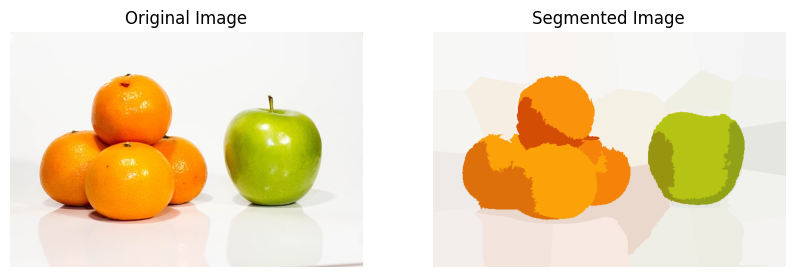

In [1]:
import skimage as ski
from skimage.segmentation import slic
from skimage.data import astronaut
from matplotlib import pyplot as plt

# Load the original image
img = ski.io.imread("./fruit.jpeg")

# Perform segmentation (this is just K-Means with K=10)
segments = slic(img, n_segments=40)

def plot_before_after(before_image, after_image, before_title='Before', after_title='After'):
    plt.figure(figsize=(10, 5))

    # Plot the before image
    plt.subplot(1, 2, 1)
    plt.imshow(before_image)
    plt.title(before_title)
    plt.axis('off')

    # Plot the after image
    plt.subplot(1, 2, 2)
    after_image = out = ski.color.label2rgb(after_image, before_image, kind='avg', bg_label=0)
    plt.imshow(after_image)
    plt.title(after_title)
    plt.axis('off')
    plt.show()

# Example usage
plot_before_after(img, segments, before_title='Original Image', after_title='Segmented Image')

Meanshift and `hierarchical clustering` are usually better:

339


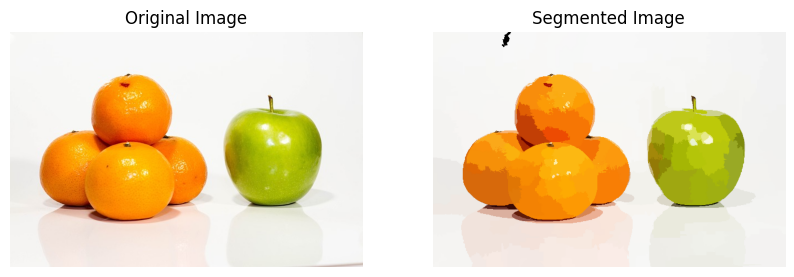

In [2]:
import skimage as ski
import numpy as np
from skimage.segmentation import quickshift
from matplotlib import pyplot as plt

# Likely an improvement over meanshift. Eitherway it deduces number of segments automatically.
segments = quickshift(img)
print(len(np.unique(segments)))
plot_before_after(img, segments, before_title='Original Image', after_title='Segmented Image')

### Hough Transform for Object Detection

- Suppose you know the mathematical equation that your object should satisfy (e.g., $(y-b)^2 + (x-a)^2=r^2$)

- Then you can create a grid containing exhaustive combinations of parameters values (e.g., $b\in[0,H]$, $a\in[0,W]$, $r\in[0,min(H,W)]$)

- Then you can count the number of points in the **edge image** that satisfy the equation

- The most likely parameters are the ones with the highest count (many points satisfy them!)

- This is called Hough Transform and it works for any object if you have its mathematical equation

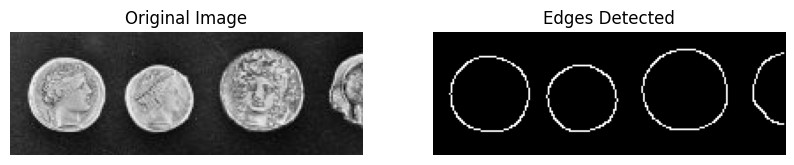

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny


# Load picture and detect edges
img = data.coins()[160:230, 70:270]
edges = canny(img, sigma=3, low_threshold=10, high_threshold=50)

# Plot both images
plt.figure(figsize=(10, 5))

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Original Image')
plt.axis('off')

# Plot the detected edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap=plt.cm.gray)
plt.title('Edges Detected')
plt.axis('off')

plt.show()

In [4]:
from skimage.draw import circle_perimeter

# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_combs = hough_circle(edges, hough_radii)
print(hough_combs.shape)                      # for each radius consider all combinations of a,b
print(edges.shape)

# Count which of the 8*7*200 combinations was satisfies by most points => take the top three
accums, cx, cy, radii = hough_circle_peaks(hough_combs, hough_radii, total_num_peaks=3)

(8, 70, 200)
(70, 200)


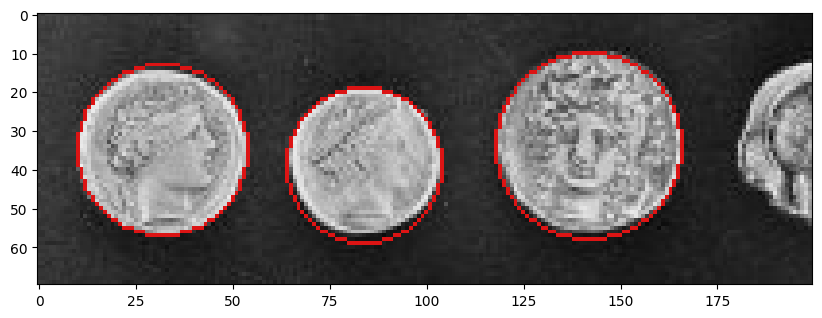

In [5]:
# Draw them three circles using the result
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(img)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()